## Regressão Logística

De volta pro assunto de classificação, o objetivo desse conteúdo é explorar a representação de texto em computadores e utilizar regressão logística para categorizar os documentos. O problema apresentado é detectar se o review de um determinado filme foi positivo ou negativo dependendo do texto apenas, e para representá-los computacionalmente será utilizada a estratégia de bag of words, em seguida, os documentos vetorizados serão passados para uma regressão logística.

In [1]:
import pandas as pd
import numpy  as np

df = pd.read_csv('movie_reviews.tsv', sep='\t', index_col=None)

df.columns

Index(['id', 'sentiment', 'review'], dtype='object')

Será chamado de X todo o texto que compõe o review, enquanto o rótulo será o "sentimento" de positivo (1) ou negativo (1).

In [2]:
X = df.review
y = df.sentiment

In [3]:
X.shape

(413,)

Para exemplificar o review, a seguir é mostrado o primeiro deles. São textos longos que contém a opinião de um usuário acerca de um filme que ele viu.

In [4]:
print(X[0])

With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 20 min

A representação de uma amostra dessa precisa ser vetorial para que matematicamente seja possível inferir algum padrão ou relação entre as palavras. Para isso, o primeiro passo normalmente é identificar o vocabulário, ou seja, o conjunto das palavras que se apresentam nas amostras. No trecho a seguir, é apresentado o grupo das palavras mais frequentes em todas as amostras.

In [5]:
from collections import Counter

# reune todas as palavras/tokens das amostras

palavras = []
for s in X.values:
    palavras += s.lower().split()

dicionario = Counter(palavras)
print(dicionario.most_common(50))

[('the', 5108), ('a', 2621), ('and', 2515), ('of', 2366), ('to', 2150), ('is', 1748), ('in', 1470), ('this', 1133), ('i', 1125), ('that', 1070), ('it', 1036), ('with', 764), ('for', 718), ('as', 708), ('but', 685), ('was', 676), ('on', 529), ('movie', 501), ('film', 492), ('are', 473), ('his', 430), ('not', 427), ('be', 421), ('have', 419), ('you', 418), ('one', 400), ('by', 379), ('at', 374), ('he', 359), ('all', 350), ('an', 350), ('from', 328), ('who', 318), ('so', 300), ('her', 299), ('like', 288), ('some', 285), ('has', 276), ('about', 272), ('just', 270), ("it's", 254), ('or', 244), ('out', 243), ('if', 242), ('they', 237), ('there', 230), ('very', 223), ('when', 214), ('their', 202), ('more', 201)]


A construção do dicionário pode incluir todas as palavras ou pode ser feita a partir de um conjunto de palavra apenas, reduzindo a quantidade de dados e, por consequência, o processamento necessário para executar os métodos de aprendizagem. No exemplo a seguir, o dicionário é construído considerando as palavras mais comuns.

In [6]:
# separa qual sera o vocabulario

vocab = []
for palavra, contagem in dicionario.most_common(1000):
    vocab.append(palavra)

print(vocab)

['the', 'a', 'and', 'of', 'to', 'is', 'in', 'this', 'i', 'that', 'it', 'with', 'for', 'as', 'but', 'was', 'on', 'movie', 'film', 'are', 'his', 'not', 'be', 'have', 'you', 'one', 'by', 'at', 'he', 'all', 'an', 'from', 'who', 'so', 'her', 'like', 'some', 'has', 'about', 'just', "it's", 'or', 'out', 'if', 'they', 'there', 'very', 'when', 'their', 'more', 'good', 'only', 'would', 'what', 'even', 'no', 'really', 'up', 'my', 'which', 'she', 'how', 'had', '-', 'can', 'into', 'will', 'than', 'see', 'get', 'other', 'been', 'were', 'make', 'because', 'its', 'people', 'much', 'first', 'most', 'we', 'also', 'me', 'could', "don't", 'story', 'bad', 'time', 'being', 'then', 'do', 'great', 'any', 'after', 'many', 'made', 'well', '&', 'think', 'way', 'little', 'never', 'over', 'where', 'films', 'watch', 'does', 'two', 'these', 'through', 'while', 'your', 'did', 'movies', 'off', 'know', 'them', 'characters', 'seen', "i'm", 'show', 'should', 'best', 'him', 'love', 'movie.', 'acting', 'those', 'ever', 'it

Após a criação do dicionário, todas as amostras serão representadas por um vetor do tamanho do dicionário. Assim, cada amostra carregará a informação se uma determinada palavra do dicionário aparece em sua composição ou não.

In [7]:
# cria a amostra marcando quais palavras aparecem naquela sentença (bag of words)

X_bow = []
for document in df.review.values:
    sample = []
    for p in vocab:
        if p in document:
            sample.append(1.0)
        else:
            sample.append(0.0)
    X_bow.append(sample)

X_bow = np.array(X_bow)

No trecho a seguir é exibida a quantidade de 1s que aparecem por amostra, ou seja, quantas palavras da amostra foram encontradas no dicionário.

In [8]:
print(X_bow.shape)
print(X_bow[0])
print(np.sum(X_bow,axis=1))

(413, 1000)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.

In [9]:
# separa em treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 1000)
(137, 1000)
(276,)
(137,)


As seguintes funções implementam a regressão logística sem utilização de alguma biblioteca pronta como scikit-learn.

In [10]:
# regressão logística e funções auxiliares

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(model, X, y):
    X = add_bias(X)
    z = np.dot(X, model)
    h = sigmoid(z)
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def add_bias(X):
    bias = np.ones((X.shape[0], 1))
    return np.concatenate((bias, X), axis=1)

def fit(X, y, lr = 0.01, num_iter = 5):

    X = add_bias(X)

    theta = np.zeros(X.shape[1])

    for _ in range(num_iter):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient

    return theta

def predict(X, theta, threshold = 0.5):
    X = add_bias(X)
    return sigmoid(np.dot(X, theta)) >= threshold

Em seguida, é necessário utilizar o método fit e o método predict, que foram criados para parecer com a nomenclatura adotada durante o curso em alinhamento com os nomes utilizados na biblioteca scikit-learn.

In [11]:
model = fit(X_train, y_train, num_iter = 20000)
print(model[:30])

preds = predict(X_test, model)
print(preds)
(preds == y_test).mean()

[ 0.02034556  0.08008777  0.02034556 -0.01056828 -0.06195841 -0.01300115
  0.27798585  0.16968745 -0.66723662  0.02034556 -0.15532044  0.18003894
 -0.1430387  -0.37318872  0.00617439 -0.38430897 -0.27244968 -0.04887233
 -0.62610927  0.17093762  0.56631492  0.01298256 -0.70716765 -0.29323103
  0.07745736  0.18768892 -0.30278551  0.09820493 -0.01743736  0.02034556]
[ True  True False  True False False False  True False False False  True
  True False  True False  True  True False  True  True False False  True
  True False False False False  True False  True False  True False  True
 False  True False False False  True False False  True  True False False
  True False  True False  True  True  True False  True  True False False
  True False False  True  True  True False  True False  True False  True
 False False False False False False False False  True False  True False
 False  True False False  True False  True  True False  True  True  True
 False False  True False False False  True False  

0.7591240875912408

E finalmente, uma comparação com a implementação do scikit-learn.

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print((preds == y_test).mean())

#model.intercept_, model.coef_

0.7664233576642335


### Previsão de Sobrevivência no Titanic com Regressão Logística

**Descrição do Problema:**
Neste exercício, seus alunos irão trabalhar com o famoso conjunto de dados do Titanic, que contém informações sobre os passageiros do Titanic e se eles sobreviveram ou não ao naufrágio. O objetivo é criar um modelo de regressão logística para prever a sobrevivência de passageiros com base em diversas características.

**Passos:**

**Passo 1: Preparação dos Dados**

* Faça o download do conjunto de dados do Titanic (você pode encontrá-lo no canvas).
* Carregue os dados em uma biblioteca de manipulação de dados, como o pandas.
* Explore o conjunto de dados para entender suas características, como as colunas disponíveis, tipos de dados, valores ausentes, etc.
* Faça a limpeza dos dados, tratando valores ausentes e convertendo variáveis categóricas em numéricas (usando codificação one-hot ou label encoding).

**Passo 2: Análise Exploratória de Dados**

* Realize uma análise exploratória dos dados para entender melhor a distribuição das variáveis e identificar tendências.
* Crie visualizações, como gráficos de barras, histogramas e gráficos de dispersão, para investigar a relação entre as variáveis e a sobrevivência dos passageiros.

**Passo 3: Preparação dos Dados para Modelagem**

* Divida os dados em um conjunto de treinamento e um conjunto de teste para avaliar o desempenho do modelo.
* Normalize ou padronize as variáveis numéricas, se necessário.
* Defina a variável alvo (sobrevivência) e as variáveis preditoras.

**Passo 4: Criação do Modelo de Regressão Logística**

* Importe a biblioteca de aprendizado de máquina, como scikit-learn.
* Crie um modelo de regressão logística usando o conjunto de treinamento.
* Treine o modelo com os dados de treinamento.

**Passo 5: Avaliação do Modelo**

* Avalie o desempenho do modelo usando métricas como precisão, recall, F1-score e matriz de confusão.
* Ajuste os hiperparâmetros do modelo, se necessário, para melhorar o desempenho.

**Passo 6: Previsões**

* Use o modelo treinado para fazer previsões sobre a sobrevivência dos passageiros no conjunto de teste.

**Passo 7: Avaliação Final**

* Avalie o modelo com o conjunto de teste para obter métricas de desempenho realistas.
* Analise as previsões e os resultados para entender como o modelo está se saindo.


<ipython-input-31-2ba4d504b8f7>:42: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_removed['Age'] = df_removed.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))


Colunas selecionadas:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Fgroup', 'Agroup', 'Embarked_C', 'Embarked_Missing', 'Embarked_Q', 'Embarked_S', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Title_6']


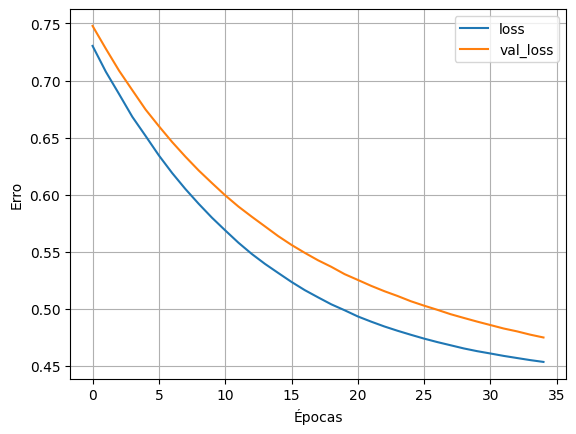

20/20 [==============================] - 0s 2ms/step
Train accuracy = 0.8186195826645265
Test accuracy = 0.8134328358208955
Precisão: 0.79
Recall: 0.76
F1-score: 0.77
Matriz de Confusão:
[[134  23]
 [ 27  84]]


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import re as re
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

## Helper
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

## Read dataset
df_dataset = pd.read_csv('titanic.csv', index_col=None)


## Feature Engineering
df_removed = df_dataset.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

df_removed['FamilySize'] = df_removed['SibSp'] + df_removed['Parch'] + 1
df_removed['IsAlone'] = 0
df_removed.loc[df_removed['FamilySize'] == 1, 'IsAlone'] = 1
df_removed['Fare'] = df_removed['Fare'].fillna(df_removed['Fare'].median())
df_removed['Fgroup'] = pd.qcut(df_removed['Fare'], 10, labels=range(10))


df_removed['Title'] = df_removed['Name'].apply(get_title)
df_removed['Age'] = df_removed.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))

df_removed['Title'] = df_removed['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady',
                                             'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
                                            ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles',
                                             'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'])
df_removed['Title'] = df_removed['Title'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1])


df_removed['Agroup'] = pd.qcut(df_removed['Age'], 10, labels=range(10))


values = {'Age': 20, 'Embarked': 'Missing'}
df_filled = df_removed.fillna(value=values)

df_filled['Sex'] = df_filled.Sex.map({"female":0, "male":1})

df_dummy = pd.get_dummies(df_filled, columns=['Embarked', 'Title'])


df_filter = df_dummy.drop(["Name"], axis=1)

X_columns = df_filter.columns.tolist()
X_columns.remove('Survived')

print("Colunas selecionadas: ",X_columns)

X = df_filter[X_columns]
y = df_filter.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

## Train / Test
model = keras.Sequential([
    normalizer,
    layers.Dense(1,  activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=35, validation_split = 0.2, verbose=0)


## Avaliation

plot_loss(history)

threshold=.5
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_train_bin = (y_pred_train > threshold).astype(int)
y_pred_test_bin = (y_pred_test > threshold).astype(int)
print(f"Train accuracy = {accuracy_score(y_train,  y_pred_train_bin)}")
print(f"Test accuracy = {accuracy_score(y_test,  y_pred_test_bin)}")

precision = precision_score(y_test, y_pred_test_bin)  # Precisão
recall = recall_score(y_test, y_pred_test_bin)  # Recall
f1 = f1_score(y_test, y_pred_test_bin)  # F1-score

print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

confusion = confusion_matrix(y_test, y_pred_test_bin)
print("Matriz de Confusão:")
print(confusion)